In [38]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

# 모든 데이터를 볼 수 있는 ( head랑 tail만 보여주는게 아니라, 다 보여주는 방법)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
# 데이터 받아 오기
data_name = f"产品销售信息-1.csv"
data_name = pd.read_csv(data_name) #Encoding cp949는 못함, 

In [40]:
## 중국어 폰트 설정 하는 방법

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:\Windows\Fonts/simhei.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 폰트를 선명하게 하기
# retina설정
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats("retina")


In [41]:
df = data_name

## 데이터 전처리 数据处理

In [42]:
# df값 여러가지 확인하기
df.mean()

C:\Users\toyou\AppData\Local\Temp/ipykernel_20464/828050077.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


价格             248.500000
收藏              31.925926
累计评论            11.685185
付款(累计）          23.935185
Unnamed: 8            NaN
Unnamed: 9            NaN
Unnamed: 10           NaN
Unnamed: 11           NaN
Unnamed: 12           NaN
dtype: float64

In [43]:
df.columns

Index(['日期', '品牌', '产品', '价格', '收藏', '累计评论', '付款(累计）', '特点活动', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [44]:
df.tail()

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）,特点活动,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
141,2022-04-28,Eternaleaf,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2022-04-29,Eternaleaf,眼霜,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2022-04-29,Eternaleaf,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2022-04-30,Eternaleaf,眼霜,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,2022-04-30,Eternaleaf,眼膜,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#이건 index이름 바꾸어주는거
#df.rename(index={2:'品牌'}, inplace=True)
#df.rename({'?品':'产品'}, axis=1, inplace = True)
#df.rename({'累???':'累计评论'}, axis=1, inplace = True)
#df.rename({'特点活?':'特点活动'}, axis=1, inplace = True)

#df.rename({'日期.1':'日期.1'}, axis=1, inplace = True)
#df.rename({'?品.1':'产品.1'}, axis=1, inplace = True)
#df.rename({'价格.1':'价格(元).1'}, axis=1, inplace = True)
#df.rename({'收藏.1':'收藏.1'}, axis=1, inplace = True)
#df.rename({'累???.1':'累计评论.1'}, axis=1, inplace = True)
#df.rename({'特点活?.1':'特点活动.1'}, axis=1, inplace = True)
#df.rename({'付款.1':'付款数.1'}, axis=1, inplace = True)


df = df.drop(['Unnamed: 8'], axis = 1)
df = df.drop(['Unnamed: 9'], axis = 1)
df = df.drop(['Unnamed: 10'], axis = 1)
df = df.drop(['Unnamed: 11'], axis = 1)
df = df.drop(['Unnamed: 12'], axis = 1)
df = df.drop(['Unnamed: 13'], axis = 1)
df = df.drop(['Unnamed: 14'], axis = 1)
df = df.drop(['特点活动'], axis = 1)

#df = df.drop(['Unnamed: 15'], axis = 1)
#df = df.drop(['Unnamed: 16'], axis = 1)
#df = df.drop(['特点活动'], axis = 1)


#df = df.drop(['??'], axis = 1)
df

# 특정 컬럼의 '메뉴'에서 '돈까스'가 포함된 행 삭제 (특정값만) , 
#방법 1 : idx = DF[DF['메뉴'] == "돈까스"].index
#         DF.drop(idx , inplace=True)
#방법 2 : DF = DF[DF.메뉴 != '돈까스']

# 컬럼 삭제하기(세로 삭제)
#df = df.drop(['情人?'], axis = 1)

# 컬럼 추가
# df.loc['7번'] = None

#컬럼 이름 바꾸기
#df.rename({'付款':'付款数'}, axis=1, inplace = True)
#df.rename({'价格':'价格(元)'}, axis=1, inplace = True)

# 행 추가
# df.loc['7번'] = None

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,398,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,99,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,398,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,99,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
5,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
6,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
7,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
8,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.0
9,2022-02-21,Eternaleaf,眼膜,99,26.0,21.0,5.0


In [46]:
#행 삭제
df = df.drop(df.index[106:])
df

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,398,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,99,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,398,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,99,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
5,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
6,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
7,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
8,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.0
9,2022-02-21,Eternaleaf,眼膜,99,26.0,21.0,5.0


In [47]:
#결측치 확인하기
df.isnull()
#결측치 0으로 다 바꾸어 주기
df = df.fillna(0)

In [48]:
# 새로운 컬럼을 다시 추가해서 안에 내용을 情人节로 설정하기
#df.loc[:,'特点活动'] = '情人节'
# 컬럼 삭제하기
#df = df.drop(['情人?'], axis = 1)
df.tail()

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
101,2022-04-08,Eternaleaf,眼膜,99,67.0,12.0,39.0
102,2022-04-09,Eternaleaf,眼霜,398,40.0,18.0,38.0
103,2022-04-09,Eternaleaf,眼膜,99,68.0,12.0,38.0
104,2022-04-10,Eternaleaf,眼霜,398,40.0,18.0,38.0
105,2022-04-10,Eternaleaf,眼膜,99,68.0,12.0,38.0


In [49]:
#df_new = df.drop(['特点活动'], axis = 1)
df_new = df.drop(['价格'], axis = 1)


df_new.head()

,日期,品牌,产品,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,6.0,3.0,17.0


In [50]:
df.corr() #상관계수 보는것 1에 가까울 수록 상관이 있다는..

,价格,收藏,累计评论,付款(累计）
价格,1.000000,-0.662094,-0.114850,0.247738
收藏,-0.662094,1.000000,0.271189,0.542267
累计评论,-0.114850,0.271189,1.000000,0.191240
付款(累计）,0.247738,0.542267,0.191240,1.000000


In [51]:
# 소수점 보이게하는거 설정하는 방법.
# df.style.set_precision(0)

## 데이터 시각화 数据可视化

In [52]:
df

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,398,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,99,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,398,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,99,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
5,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
6,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
7,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
8,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.0
9,2022-02-21,Eternaleaf,眼膜,99,26.0,21.0,5.0


<AxesSubplot:ylabel='日期'>

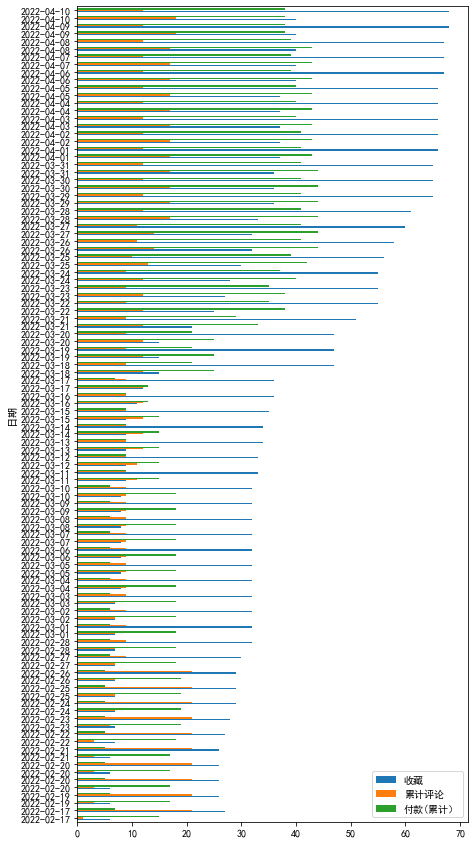

In [53]:
# 막대 그래프
df_new.plot(x='日期', kind='barh',figsize=(7,15))

<Figure size 360x360 with 0 Axes>

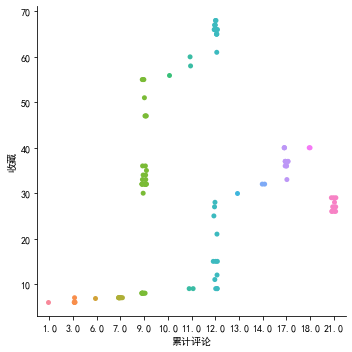

<Figure size 360x360 with 0 Axes>

In [54]:
sns.catplot(data=df, x="累计评论", y="收藏")
plt.figure(figsize=(5,5))


<AxesSubplot:ylabel='Frequency'>

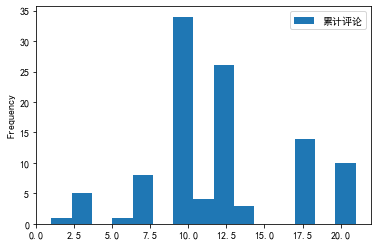

In [55]:
#히스토 그램
df.plot(kind='hist', y='累计评论', bins = 15)

In [56]:
df

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,398,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,99,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,398,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,99,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
5,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
6,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
7,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
8,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.0
9,2022-02-21,Eternaleaf,眼膜,99,26.0,21.0,5.0


<AxesSubplot:>

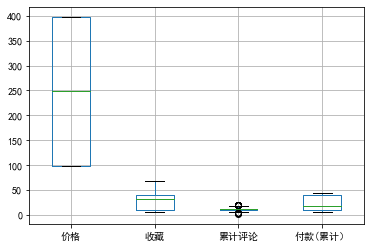

In [57]:
#  box plot
df.boxplot()

<AxesSubplot:xlabel='收藏', ylabel='付款(累计）'>

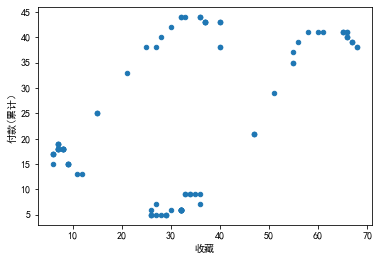

In [58]:
#scatter plot
df.plot(kind='scatter',x='收藏',y='付款(累计）' )

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points 

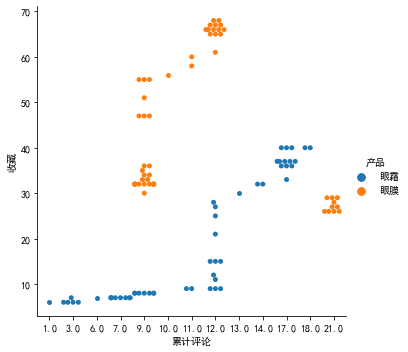

In [59]:
sns.catplot(data = df, x = "累计评论", y = "收藏", kind = "swarm", hue = "产品")

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='收藏', ylabel='Density'>

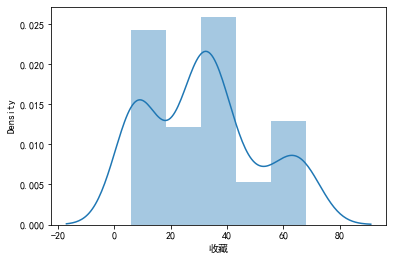

In [60]:

sns.distplot(df["收藏"]) 

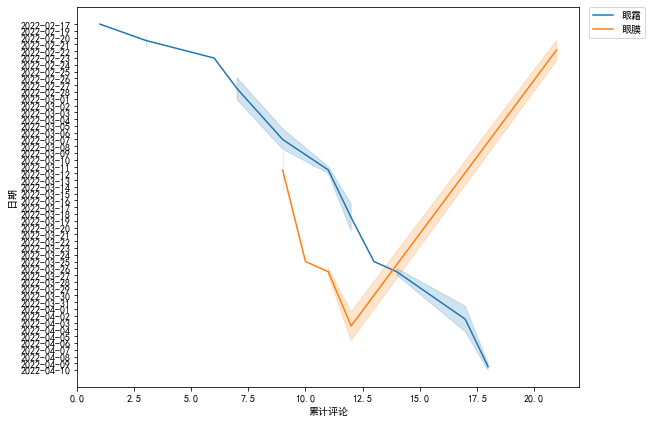

In [61]:
#seaborn은 사용법이 비슷하다
plt.figure(figsize=(9,7))
sns.lineplot(data=df, x="累计评论", y="日期", hue='产品')

#레전드값을 바깥에 그릴수 있게 하는 방법
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)  

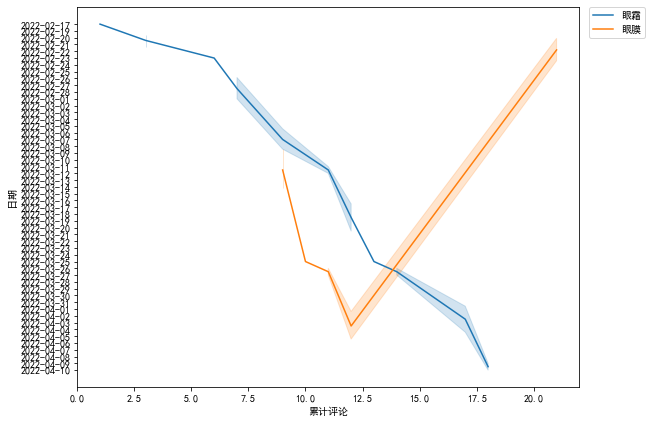

In [62]:
#seaborn은 사용법이 비슷하다
plt.figure(figsize=(9,7))
sns.lineplot(data=df, x="累计评论", y="日期", hue='产品')

#레전드값을 바깥에 그릴수 있게 하는 방법
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)  

<AxesSubplot:xlabel='累计评论', ylabel='日期'>

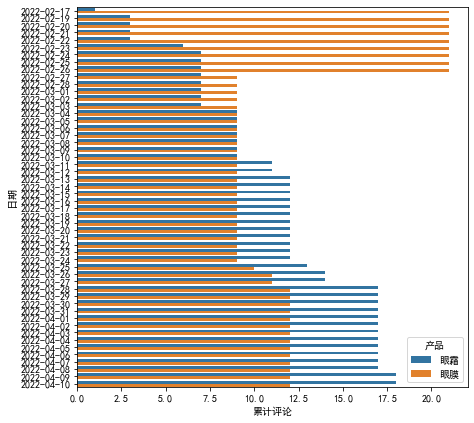

In [63]:
# 评论样子
plt.figure(figsize=(7,7))
sns.barplot(data=df, x="累计评论", y="日期", hue='产品')

<AxesSubplot:xlabel='收藏', ylabel='日期'>

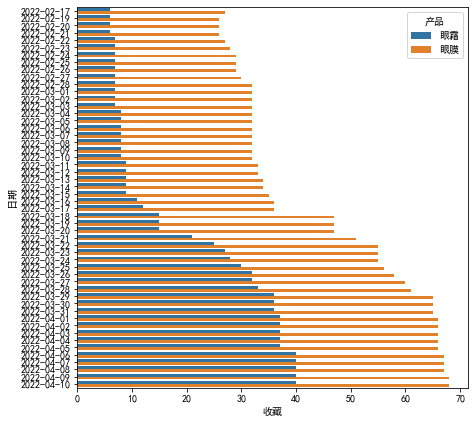

In [64]:
# 收藏样子
plt.figure(figsize=(7,7))
sns.barplot(data=df, x="收藏", y="日期", hue='产品')

<AxesSubplot:xlabel='付款(累计）', ylabel='日期'>

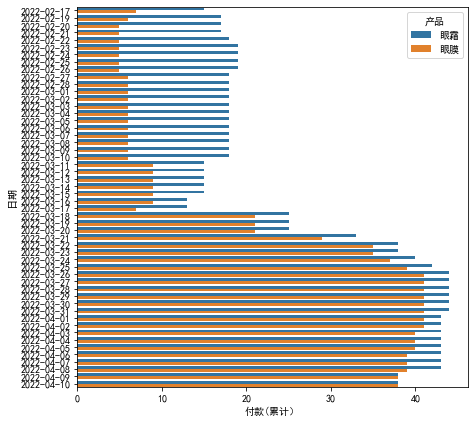

In [65]:
# 付款(累计）样子
plt.figure(figsize=(7,7))
sns.barplot(data=df, x="付款(累计）", y="日期", hue='产品')

<AxesSubplot:xlabel='日期'>

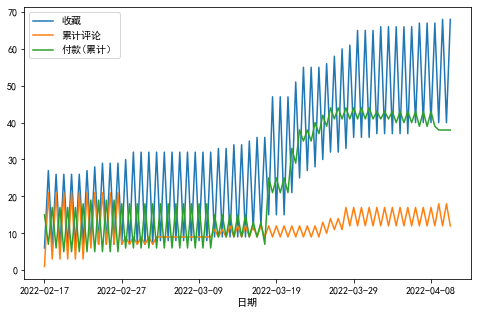

In [66]:
# 总体zonogti33样子
plt.rcParams["figure.figsize"] = (8, 5)
df_new.plot(x='日期')

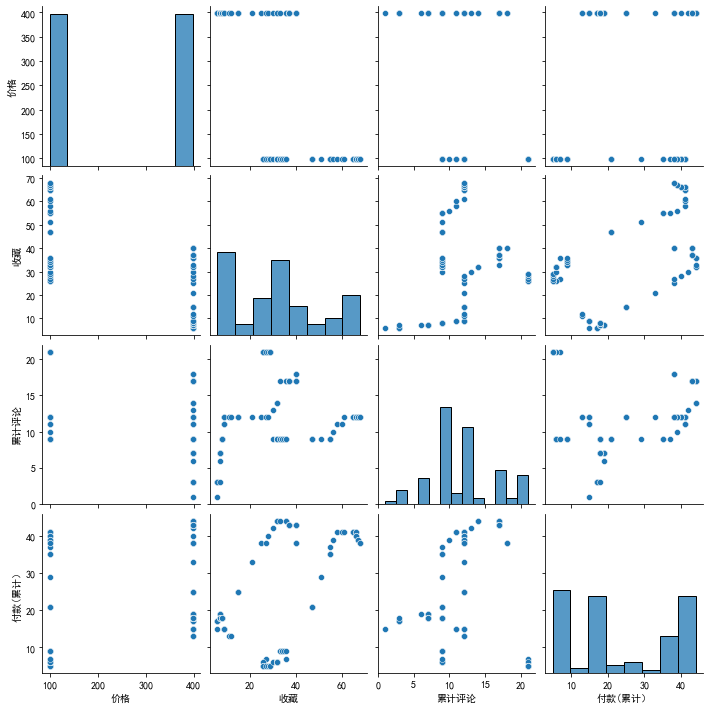

In [67]:
# 确认数据相关的关系
grid_ndf = sns.pairplot(df) 
#　累计评论和收藏越高的话　付钱数也一起增加。

In [68]:
df.columns

Index(['日期', '品牌', '产品', '价格', '收藏', '累计评论', '付款(累计）'], dtype='object')

Text(0, 0.5, '累计评论')

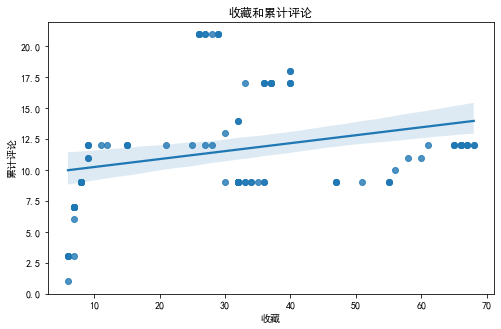

In [69]:
# 加两个产品的评论和收藏的话 趋势线展现一点点向右上行的样子
ax=plt.subplot()
ax=sns.regplot(x='收藏', y='累计评论', data = df)
ax.set_title('收藏和累计评论')
ax.set_xlabel('收藏')
ax.set_ylabel('累计评论')

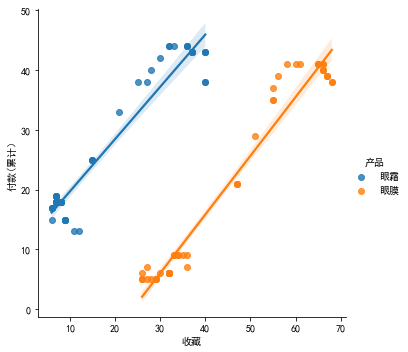

In [70]:
# 眼霜和眼膜 评论和收藏趋势
# 各个产品的趋势线，眼霜向右上行，眼膜向右下行。
sns.lmplot(x='收藏',y='付款(累计）', hue='产品', height=5, data=df)
plt.show()

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


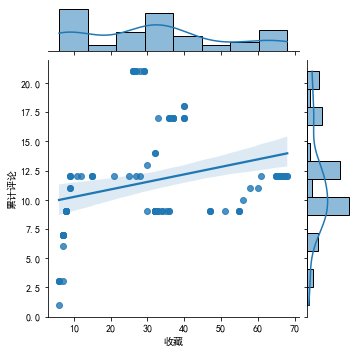

In [71]:
sns.jointplot('收藏','累计评论', height =5, data = df, kind='reg')
plt.show()

In [72]:
# https://blog.naver.com/shining0617/222640336743 나중에 추세선 그리면서 여러가지 분할 모습으로 나타낼때 참조하자!

# 머신러닝 회귀 이용해보기 通过机器学习回归分析预测未来

train data 개수 :  74
testdata 개수 :  32
0.2300181139534342
기울기 a:  [[0.41382737]]


y절편 b [10.48354374]


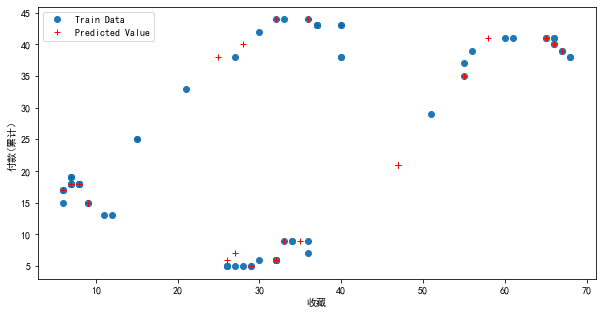

C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\toyou\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


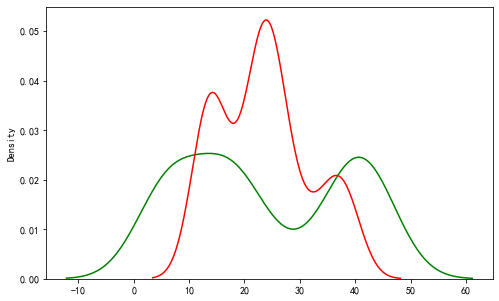

In [73]:
X=df[['收藏']] # 독립 변수 X
y=df[['付款(累计）']]    # 종속 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,            # 독립 변수
                                                   y,             # 종속 변수
                                                   test_size=0.3,  # 검증 30%
                                                   random_state=10 # 랜덤 추출 값
                                                   )

print('train data 개수 : ', len(X_train))
print('testdata 개수 : ', len(X_test))

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀 분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)

print(r_square)

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)

# 산점도 그림 그리기
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('收藏')
plt.ylabel('付款(累计）')
plt.show()
plt.close()


# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(8, 5))
ax1 = sns.distplot(y, hist=False, color = 'green',label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", color ='red', ax=ax1)


plt.show()
plt.close()

In [74]:
df

,日期,品牌,产品,价格,收藏,累计评论,付款(累计）
0,2022-02-17,Eternaleaf,眼霜,398,6.0,1.0,15.0
1,2022-02-17,Eternaleaf,眼膜,99,27.0,21.0,7.0
2,2022-02-19,Eternaleaf,眼霜,398,6.0,3.0,17.0
3,2022-02-19,Eternaleaf,眼膜,99,26.0,21.0,6.0
4,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
5,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
6,2022-02-20,Eternaleaf,眼霜,398,6.0,3.0,17.0
7,2022-02-20,Eternaleaf,眼膜,99,26.0,21.0,5.0
8,2022-02-21,Eternaleaf,眼霜,398,6.0,3.0,17.0
9,2022-02-21,Eternaleaf,眼膜,99,26.0,21.0,5.0
